In [205]:
# importing required Pakages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
#Converting csv to Dataframe

df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')
df

C:\Users\joeva\AppData\Local\Temp\ipykernel_27488\1351903942.py:3: DtypeWarning: Columns (26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')


,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,...,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
0,0,57,1,1,0 days 00:02:23.141000,0,NaN,52.533,0,45.335,...,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000,143.141
1,1,88,2,1,0 days 00:02:24.016000,0,NaN,52.915,0,45.342,...,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875,144.016
2,2,50,2,1,0 days 00:02:25.278000,0,NaN,53.568,0,45.577,...,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137,145.278
3,3,70,2,1,0 days 00:02:25.548000,0,NaN,53.938,0,45.614,...,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407,145.548
4,4,61,2,1,0 days 00:02:25.859000,0,NaN,54.482,0,45.816,...,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718,145.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,503675,7,3,378,0 days 00:03:32.801000,0,NaN,33.645,0,80.892,...,Toyota Gazoo Racing #7 Stint #33,86220663,2.0,2.0,121119.0,121.119,212.801,121.119,121.119,86220.663
503676,503676,8,2,379,0 days 00:03:32.310000,0,NaN,33.323,0,80.052,...,Toyota Gazoo Racing #8 Stint #32,86311854,1.0,1.0,91191.0,91.191,91.191,0.000,0.000,86311.854
503677,503677,7,3,379,0 days 00:03:33.348000,0,NaN,34.550,0,81.034,...,Toyota Gazoo Racing #7 Stint #33,86434011,2.0,2.0,122157.0,122.157,213.348,122.157,122.157,86434.011
503678,503678,8,2,380,0 days 00:03:36.142000,0,NaN,33.452,0,80.406,...,Toyota Gazoo Racing #8 Stint #32,86527996,1.0,1.0,93985.0,93.985,93.985,0.000,0.000,86527.996


In [207]:
# number: The car number that completed the lap
# driver_number: The driver of the car number that completed the lap
# lap_number: The lap number of the race the lap was completed at
# lap_time: The lap time recorded as they crossed the timing beam
# lap_improvement: Haven't looked into this, but my guess would a variable showing if the driver made improvement vs previous lap_times. Likely 0 is no improvement, 1 is green (personal best), 2 is purple (race best), and 3 is a WR? 99% of the laps have 0 improvement, so further research probably needed.
# crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, nan else
# s1, s2, s3 The sector times recorded as they crossed the timing beam (recorded in ss.mss)
# s1/s2/s3_improvement similar to lap_improvement
# s1/s2/s3_large: how they crossed the timing beams similar to lap_time
# kph: the average kph of the lap
# top_speed: the fastest recorded time of the lap
# driver_name: the driver that recorded the lap
# pit_time: the recorded time that was spent in the pitlane (typically followed by "B" in crossing_finish_line_in_pit)
# class: the class of the car that set the lap time
# group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)
# team: the team of the car that set the lap
# manufacturer: the manufacturer of the car that set the lap
# season: the WEC season the lap was set at
# circuit: the circuit the lap was set at
# round: the round (race number in the championship) the lap was set at
# vehicle: the car the lap was set with
# flag_at_fl: the flag status at the timing beam (only for 2022)
# lap_time_ms: The lap time recorded in milliseconds (seconds*1000)
# lap_time_s: the lap time recorded in seconds
# team_no: A combination of team and the team's number e.g Toyota Gazoo Racing #7
# engine: The engine of the car the lap was set with.
# driver_stint_no: Labeling the driver stint. A stint changes when the driver pits and either a. stays in the car, or b. swaps into the car.
# driver_stint: A combination of driver_name and the driver_stint_no, e.g. Mike CONWAY Stint #1
# team_stint_no: Labeling the team stint. A stint changes when the driver pits.
# team_stint: A combination of team_no and the team_stint_no, e.g. Toyota Gazoo Racing #7 Stint #1
# position: The position of the car at the time of the lap.
# class_position: The position of the car in class at the time of the lap.
# interval_ms: The interval (gap to the car in front for position) in ms
# interval: The interval (gap to the car in front for position) in s
# gap: The total time to the leader (time to 1st position overall) in s
# class_interval: The interval (gap to the car in front for position in class) in s
# class_gap The total time to the leader (time to 1st position in class) in s

#### Preprocessing

In [208]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   503680 non-null  int64  
 1   number                       503680 non-null  int64  
 2   driver_number                503680 non-null  int64  
 3   lap_number                   503680 non-null  int64  
 4   lap_time                     503680 non-null  object 
 5   lap_improvement              503680 non-null  int64  
 6   crossing_finish_line_in_pit  28445 non-null   object 
 7   s1                           503569 non-null  float64
 8   s1_improvement               503680 non-null  int64  
 9   s2                           503406 non-null  float64
 10  s2_improvement               503680 non-null  int64  
 11  s3                           503486 non-null  float64
 12  s3_improvement               503680 non-null  int64  
 13 

In [209]:
df.describe()

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
count,503680.00000,503680.000000,503680.000000,503680.000000,503680.000000,503569.000000,503680.000000,503406.000000,503680.000000,503486.000000,...,503680.000000,5.036800e+05,503680.000000,503680.000000,5.036800e+05,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000
mean,251839.50000,53.766256,1.341775,118.358517,0.010076,44.221335,0.018857,63.995318,0.018887,65.954284,...,8.182618,2.251623e+07,18.534333,5.700790,1.589048e+05,158.904821,2179.684949,131.506613,420.611197,22516.229955
std,145400.03613,67.623157,0.940485,83.514817,0.143167,111.896698,0.170342,29.421726,0.170484,48.209154,...,8.055612,2.175151e+07,12.772971,4.364912,5.976172e+05,597.617202,2859.444803,582.349385,985.250399,21751.510146
min,0.00000,0.000000,0.000000,1.000000,0.000000,16.690000,0.000000,25.266000,0.000000,15.220000,...,0.000000,8.438800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,84.388000
25%,125919.75000,25.000000,1.000000,52.000000,0.000000,33.644000,0.000000,42.750000,0.000000,35.252000,...,3.000000,7.497529e+06,8.000000,2.000000,6.773000e+03,6.773000,338.071750,2.748000,15.846000,7497.528750
50%,251839.50000,47.000000,1.000000,104.000000,0.000000,36.712000,0.000000,52.883500,0.000000,44.798000,...,5.000000,1.514634e+07,17.000000,5.000000,3.163300e+04,31.633000,1182.121000,20.409000,96.684500,15146.341500
75%,377759.25000,77.000000,2.000000,166.000000,0.000000,39.343000,0.000000,85.384000,0.000000,102.728000,...,10.000000,2.769537e+07,26.000000,8.000000,1.165655e+05,116.565500,2634.542250,83.238250,375.221000,27695.366750
max,503679.00000,777.000000,3.000000,395.000000,3.000000,18025.929000,3.000000,3646.889000,3.000000,3653.638000,...,50.000000,8.692520e+07,62.000000,27.000000,2.455741e+07,24557.407000,40495.937000,24557.407000,27002.532000,86925.196000


In [210]:
df.shape

(503680, 48)

In [211]:
df.isna().sum()

Unnamed: 0                          0
number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit    475235
s1                                111
s1_improvement                      0
s2                                274
s2_improvement                      0
s3                                194
s3_improvement                      0
kph                                 0
elapsed                             0
hour                                0
s1_large                          116
s2_large                          281
s3_large                          201
top_speed                        1949
driver_name                         0
pit_time                       475036
class                               0
group                          423118
team                                0
manufacturer                        0
season      

In [212]:
# Removing columns With large number of missing values

df.drop(columns=['crossing_finish_line_in_pit','group','flag_at_fl','pit_time'],axis=1,inplace=True)
df.shape

(503680, 44)

In [213]:
# fill ing missing values

df['s1']=df['s1'].fillna(df['s1'].mean())
df['s2']=df['s2'].fillna(df['s2'].mean())
df['s3']=df['s3'].fillna(df['s3'].mean())
df['top_speed']=df['top_speed'].fillna(df['top_speed'].median())
df['s1_large']=df['s1_large'].fillna(df['s1_large'].mode()[0])
df['s2_large']=df['s2_large'].fillna(df['s2_large'].mode()[0])
df['s3_large']=df['s3_large'].fillna(df['s3_large'].mode()[0])

df.isna().sum()

Unnamed: 0         0
number             0
driver_number      0
lap_number         0
lap_time           0
lap_improvement    0
s1                 0
s1_improvement     0
s2                 0
s2_improvement     0
s3                 0
s3_improvement     0
kph                0
elapsed            0
hour               0
s1_large           0
s2_large           0
s3_large           0
top_speed          0
driver_name        0
class              0
team               0
manufacturer       0
season             0
circuit            0
round              0
vehicle            0
team_no            0
lap_time_ms        0
lap_time_s         0
engine             0
driver_stint_no    0
driver_stint       0
team_stint_no      0
team_stint         0
elapsed_ms         0
position           0
class_position     0
interval_ms        0
interval           0
gap                0
class_interval     0
class_gap          0
elapsed_s          0
dtype: int64

In [214]:
df.columns

Index(['Unnamed: 0', 'number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 's1', 's1_improvement', 's2', 's2_improvement', 's3',
       's3_improvement', 'kph', 'elapsed', 'hour', 's1_large', 's2_large',
       's3_large', 'top_speed', 'driver_name', 'class', 'team', 'manufacturer',
       'season', 'circuit', 'round', 'vehicle', 'team_no', 'lap_time_ms',
       'lap_time_s', 'engine', 'driver_stint_no', 'driver_stint',
       'team_stint_no', 'team_stint', 'elapsed_ms', 'position',
       'class_position', 'interval_ms', 'interval', 'gap', 'class_interval',
       'class_gap', 'elapsed_s'],
      dtype='object')

C:\Users\joeva\AppData\Local\Temp\ipykernel_27488\2810177227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=df,palette='pastel')


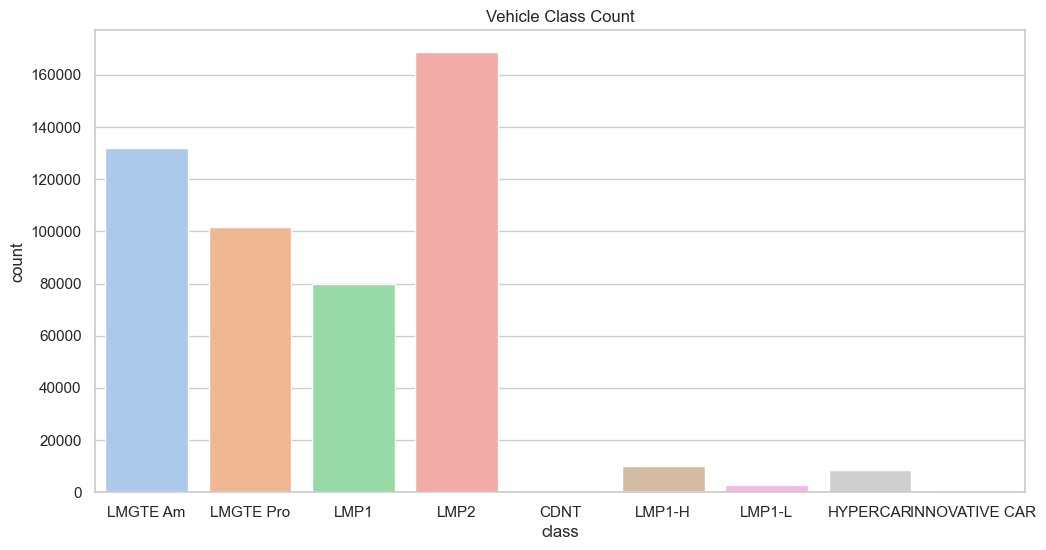

In [215]:
plt.figure(figsize=(12,6))
sns.countplot(x='class',data=df,palette='pastel')
plt.title('Vehicle Class Count')
plt.show()

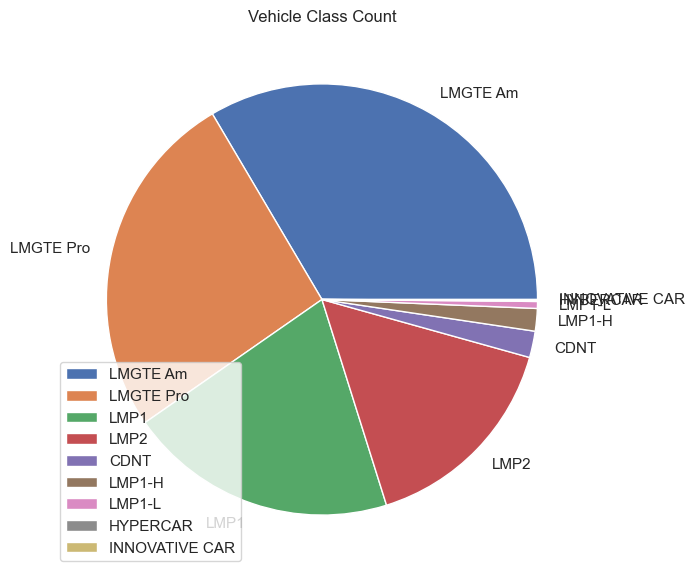

In [216]:
plt.figure(figsize=(7,7))
plt.pie(df['class'].value_counts(),labels=df['class'].unique())
plt.title('Vehicle Class Count')
plt.legend(loc='lower left')
plt.show()

In [217]:
df['class'].value_counts()

class
LMP2              168680
LMGTE Am          131889
LMGTE Pro         101579
LMP1               79703
LMP1-H              9978
HYPERCAR            8512
LMP1-L              2610
CDNT                 395
INNOVATIVE CAR       334
Name: count, dtype: int64

In [218]:
correlation = df.corr(numeric_only=True)
correlation

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
Unnamed: 0,1.000000,0.152717,0.452919,0.095062,-0.003373,-0.003881,-0.003862,0.064071,-0.003995,0.103215,...,0.142799,0.108631,0.155152,0.210794,-0.031325,-0.031325,0.002395,-0.027880,-0.010323,0.108631
number,0.152717,1.000000,0.060586,-0.004937,-0.000302,0.002528,-0.000468,0.057649,-0.000492,0.050256,...,-0.023471,0.024536,0.249014,-0.000028,0.002826,0.002826,0.093921,0.004187,-0.019411,0.024536
driver_number,0.452919,0.060586,1.000000,0.112882,0.006348,0.001668,0.000977,0.096766,0.000430,0.111172,...,0.137494,0.125427,0.096540,0.125226,0.015109,0.015109,0.052141,0.017812,0.035509,0.125427
lap_number,0.095062,-0.004937,0.112882,1.000000,-0.005095,0.000449,-0.010673,0.251113,-0.012694,0.273347,...,0.874654,0.909503,0.020658,0.071220,0.157808,0.157808,0.622642,0.129993,0.352801,0.909503
lap_improvement,-0.003373,-0.000302,0.006348,-0.005095,1.000000,-0.006114,0.211529,-0.021345,0.338886,-0.019792,...,-0.006373,-0.007413,-0.006356,-0.008046,-0.000332,-0.000332,-0.003523,0.000613,-0.001747,-0.007413
s1,-0.003881,0.002528,0.001668,0.000449,-0.006114,1.000000,-0.009457,0.076707,-0.003624,0.049355,...,0.028247,0.029485,0.061496,0.051093,0.096799,0.096799,0.075229,0.099828,0.102484,0.029485
s1_improvement,-0.003862,-0.000468,0.000977,-0.010673,0.211529,-0.009457,1.000000,-0.027185,0.129869,-0.023872,...,-0.013648,-0.013713,-0.007427,-0.009215,-0.000727,-0.000727,-0.008353,0.000034,-0.004201,-0.013713
s2,0.064071,0.057649,0.096766,0.251113,-0.021345,0.076707,-0.027185,1.000000,-0.030769,0.690158,...,0.471505,0.493342,0.407149,0.320668,0.110207,0.110207,0.456218,0.106857,0.271947,0.493342
s2_improvement,-0.003995,-0.000492,0.000430,-0.012694,0.338886,-0.003624,0.129869,-0.030769,1.000000,-0.025459,...,-0.013597,-0.014581,-0.007222,-0.007720,-0.000914,-0.000914,-0.008573,0.000189,-0.004680,-0.014581
s3,0.103215,0.050256,0.111172,0.273347,-0.019792,0.049355,-0.023872,0.690158,-0.025459,1.000000,...,0.454573,0.477531,0.366041,0.308628,0.110132,0.110132,0.425967,0.107173,0.266858,0.477531


<Axes: >

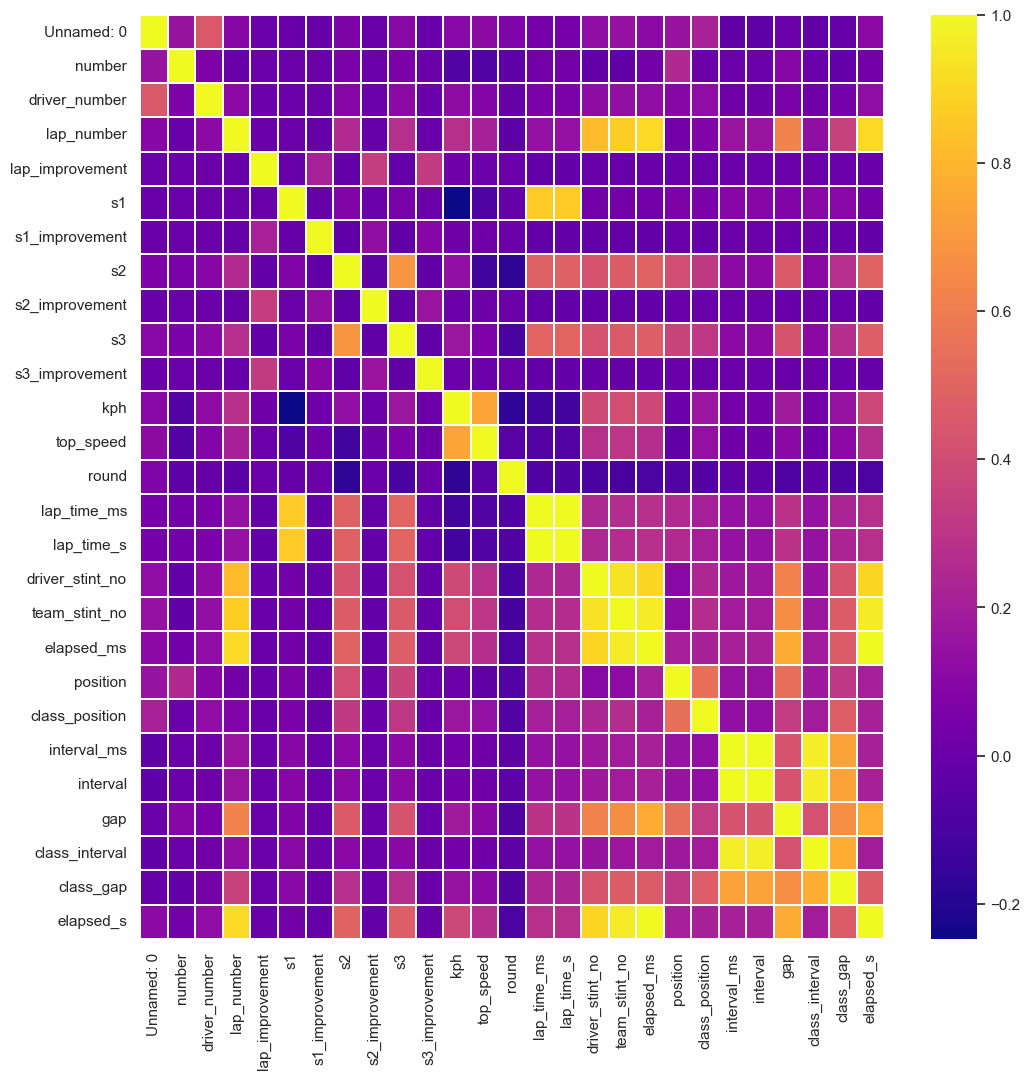

In [219]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cmap='plasma',linecolor='white',linewidths=0.3)


In [220]:
#Removing unvanted columns and columns with duplicate values
df.drop(columns=['Unnamed: 0','driver_name','lap_time','lap_time_ms','team_no','s1_improvement','s2_improvement','s3_improvement','s1_large','s2_large','s3_large','lap_improvement','elapsed_s','elapsed','hour','driver_stint','team_stint','vehicle'],axis=1,inplace=True)
df.shape

(503680, 26)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   number           503680 non-null  int64  
 1   driver_number    503680 non-null  int64  
 2   lap_number       503680 non-null  int64  
 3   s1               503680 non-null  float64
 4   s2               503680 non-null  float64
 5   s3               503680 non-null  float64
 6   kph              503680 non-null  float64
 7   top_speed        503680 non-null  float64
 8   class            503680 non-null  object 
 9   team             503680 non-null  object 
 10  manufacturer     503680 non-null  object 
 11  season           503680 non-null  object 
 12  circuit          503680 non-null  object 
 13  round            503680 non-null  int64  
 14  lap_time_s       503680 non-null  float64
 15  engine           503680 non-null  object 
 16  driver_stint_no  503680 non-null  int6

In [222]:
df['season'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, '2017', '2018-2019',
       '2019-2020', '2021', 2021, 2022], dtype=object)

In [223]:
# Converting the feature 'season' from mixed dtypes to int dtype

df['season']=df['season'].astype(str)
df[['season_start','season_end']]=df['season'].str.split('-',expand=True)
df['season_start'].value_counts()

season_start
2018    69443
2016    62095
2012    54432
2017    53964
2019    52972
2015    52702
2021    50051
2014    43644
2013    34083
2022    30294
Name: count, dtype: int64

In [224]:
#Dropping season and season end

df.drop(columns=['season','season_end'],axis=1,inplace=True)

In [225]:
# Convert 'season_start' to integer
df['season_start'] = pd.to_numeric(df['season_start'])

In [226]:
df['circuit'].unique()

array(['SEBRING', 'SPA FRANCORCHAMPS', 'LE MANS', 'INTERLAGOS',
       'SILVERSTONE', 'BAHRAIN INTERNATIONAL CIRCUIT', 'FUJI SPEEDWAY',
       'SHANGHAI INTERNATIONAL CIRCUIT', 'CIRCUIT OF THE AMERICAS',
       'NURBURGRING', 'AUTODROMO HERMANOS RODRIGUEZ', 'LE MANS 2018',
       'SPA FRANCORCHAMPS 2019', 'LE MANS 2019',
       'BAHRAIN INTERNATIONAL CIRCUIT 2019',
       'BAHRAIN INTERNATIONAL CIRCUIT 2020', 'AUTODROMO DO ALGARVE',
       'AUTODROMO NAZIONALE DI MONZA',
       'BAHRAIN INTERNATIONAL CIRCUIT 6 HOURS',
       'BAHRAIN INTERNATIONAL CIRCUIT 8 HOURS'], dtype=object)

LE MANS                                   11 /
SPA FRANCORCHAMPS                         18 / 
FUJI SPEEDWAY                             9  /
SILVERSTONE                               17 /
SHANGHAI INTERNATIONAL CIRCUIT            16 /
BAHRAIN INTERNATIONAL CIRCUIT             3 /
CIRCUIT OF THE AMERICAS                   8 /
SEBRING                                   15 /
LE MANS 2019                              13 /
LE MANS 2018                              12 /
NURBURGRING                               14 /
INTERLAGOS                                10 /
AUTODROMO HERMANOS RODRIGUEZ              1 / 
AUTODROMO DO ALGARVE                       0 /  
BAHRAIN INTERNATIONAL CIRCUIT 2019         4 /
BAHRAIN INTERNATIONAL CIRCUIT 8 HOURS      7 /
AUTODROMO NAZIONALE DI MONZA               2 /
BAHRAIN INTERNATIONAL CIRCUIT 2020         5 /
BAHRAIN INTERNATIONAL CIRCUIT 6 HOURS      6 /
SPA FRANCORCHAMPS 2019                     19 

In [227]:
df['team'].value_counts()

team
AF Corse                     46368
Aston Martin Racing          34437
Audi Sport Team Joest        19125
Toyota Gazoo Racing          18711
Rebellion Racing             18158
                             ...  
PR1 Motorsports                157
G-Drive Racing by Algarve      105
Highcroft Racing                75
Eurointernational               26
Nissan Motorsports Global        5
Name: count, Length: 181, dtype: int64

In [228]:
df['engine'].value_counts()

engine
Gibson          100462
Porsche          89104
Ferrari          85583
Nissan           62259
Aston Martin     43997
Toyota           38605
Audi             19659
Chevrolet        13066
Ford             12874
AER              10063
Honda             9638
Judd              8370
BMW               3106
Pipo Moteurs      2307
Lotus             2270
SARD              1196
Nismo              505
GIBSON             312
Srt                304
Name: count, dtype: int64

In [229]:
df['manufacturer'].value_counts()

manufacturer
Oreca             91957
Porsche           89104
Ferrari           85583
Aston Martin      43997
Toyota            28736
Ligier            23469
Audi              19659
Rebellion         14501
Alpine            13182
Chevrolet         13066
Ford              12874
Morgan            10006
Lola               7793
Zytek              5806
HPD (Honda)        5529
Dallara            5348
LIGIER             4388
BR01               4218
BR Engineering     3532
Gibson             3297
BMW                3106
CLM                2744
Glickenhaus        2307
Aurus              1961
Ginetta            1681
Enso               1285
Dome               1130
Oak                 987
Nissan              671
Norma               391
HPD                 348
Riley               312
Srt                 304
ENSO                252
Strakka             156
Name: count, dtype: int64

In [230]:
df['team_stint_no']

0          1
1          1
2          1
3          1
4          1
          ..
503675    33
503676    32
503677    33
503678    32
503679    33
Name: team_stint_no, Length: 503680, dtype: int64

In [231]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['circuit']=label.fit_transform(df['circuit'])
df['team']=label.fit_transform(df['team'])
df['engine']=label.fit_transform(df['engine'])
df['manufacturer']=label.fit_transform(df['manufacturer'])
df.dtypes


number               int64
driver_number        int64
lap_number           int64
s1                 float64
s2                 float64
s3                 float64
kph                float64
top_speed          float64
class               object
team                 int64
manufacturer         int64
circuit              int64
round                int64
lap_time_s         float64
engine               int64
driver_stint_no      int64
team_stint_no        int64
elapsed_ms           int64
position           float64
class_position     float64
interval_ms        float64
interval           float64
gap                float64
class_interval     float64
class_gap          float64
season_start         int64
dtype: object

In [232]:
df['team'].value_counts()

team
2      46368
13     34437
16     19125
172    18711
134    18158
       ...  
111      157
56       105
69        75
48        26
106        5
Name: count, Length: 181, dtype: int64

In [233]:
df['manufacturer'].value_counts()

manufacturer
27    91957
28    89104
13    85583
1     43997
33    28736
21    23469
2     19659
29    14501
0     13182
8     13066
14    12874
23    10006
22     7793
34     5806
19     5529
9      5348
20     4388
6      4218
5      3532
15     3297
4      3106
7      2744
17     2307
3      1961
16     1681
12     1285
10     1130
26      987
24      671
25      391
18      348
30      312
31      304
11      252
32      156
Name: count, dtype: int64

In [234]:
df['engine'].value_counts()

engine
8     100462
15     89104
5      85583
13     62259
1      43997
18     38605
2      19659
4      13066
6      12874
0      10063
9       9638
10      8370
3       3106
14      2307
11      2270
16      1196
12       505
7        312
17       304
Name: count, dtype: int64

#### Visualization

<Axes: >

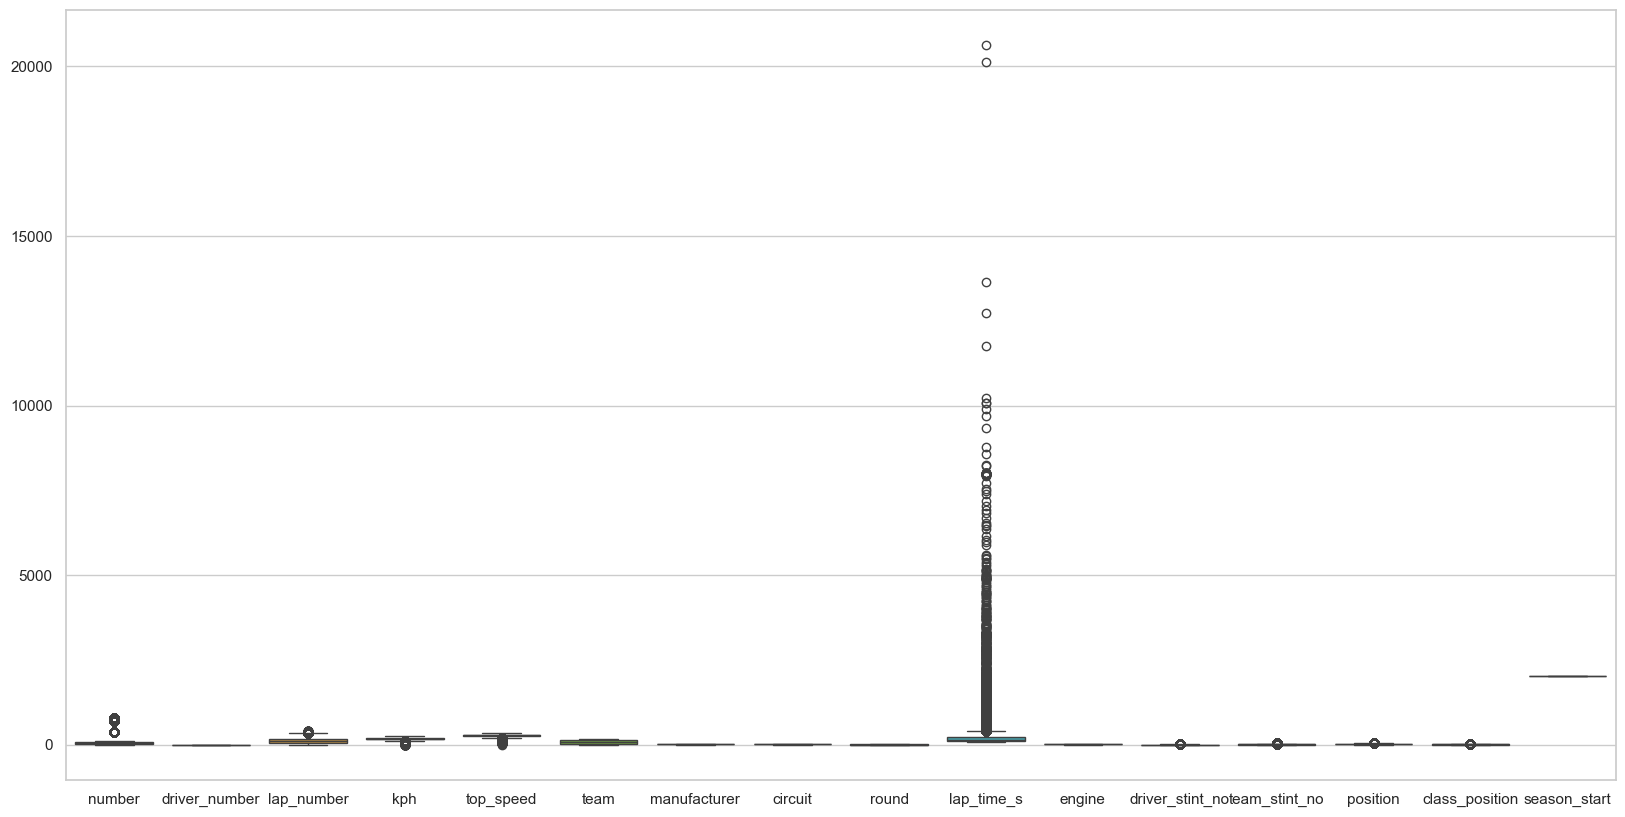

In [235]:
#droping interval_ms, interval, elapsed_ms,gap,class_interval,class_gap as thay do not affect classification
df.drop(columns=['interval_ms', 'interval', 'elapsed_ms','gap','class_interval','class_gap','s1','s2','s3'],axis=1,inplace=True)
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [236]:
outlier_columns=['top_speed','kph','position','class_position','lap_number']

def remove_outlier(df,columns):
    for col in columns:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

cleaned_df=remove_outlier(df,outlier_columns)

In [237]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler


x=cleaned_df.drop('class',axis=1)
y=cleaned_df['class']

threshold=10000
class_counts=y.value_counts()
SampleStrategy={lable:threshold for lable, count in class_counts.items() if count > threshold}

RUS=RandomUnderSampler(sampling_strategy=SampleStrategy,random_state=42)

undersampled_x,undersampled_y=RUS.fit_resample(x,y)

undersampled_df=pd.DataFrame(undersampled_x)
undersampled_y=pd.DataFrame(undersampled_y)
undersampled_df=pd.concat((undersampled_df,undersampled_y),axis=1)
undersampled_df

,number,driver_number,lap_number,kph,top_speed,team,manufacturer,circuit,round,lap_time_s,engine,driver_stint_no,team_stint_no,position,class_position,season_start,class
13232,0,1,1,187.3,280.2,69,24,11,3,261.958,13,1,1,31.0,1.0,2012,CDNT
13288,0,1,2,207.7,295.3,69,24,11,3,236.264,13,1,1,30.0,1.0,2012,CDNT
13344,0,1,3,207.6,298.5,69,24,11,3,236.285,13,1,1,32.0,1.0,2012,CDNT
13400,0,1,4,212.1,299.3,69,24,11,3,231.298,13,1,1,32.0,1.0,2012,CDNT
13456,0,1,5,213.6,293.7,69,24,11,3,229.693,13,1,1,30.0,1.0,2012,CDNT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472918,29,2,218,169.7,264.9,131,27,7,6,114.793,8,4,10,8.0,5.0,2021,LMP2
383424,36,1,106,145.4,299.2,149,0,16,3,134.923,8,2,4,9.0,4.0,2019,LMP2
427325,20,2,129,172.2,282.9,68,27,18,1,146.422,8,4,9,12.0,9.0,2021,LMP2
264316,23,1,143,222.7,316.3,113,21,11,3,220.352,8,5,16,15.0,12.0,2017,LMP2


In [238]:
# reset index values

undersampled_df.reset_index(drop=True,inplace=True)
undersampled_df

,number,driver_number,lap_number,kph,top_speed,team,manufacturer,circuit,round,lap_time_s,engine,driver_stint_no,team_stint_no,position,class_position,season_start,class
0,0,1,1,187.3,280.2,69,24,11,3,261.958,13,1,1,31.0,1.0,2012,CDNT
1,0,1,2,207.7,295.3,69,24,11,3,236.264,13,1,1,30.0,1.0,2012,CDNT
2,0,1,3,207.6,298.5,69,24,11,3,236.285,13,1,1,32.0,1.0,2012,CDNT
3,0,1,4,212.1,299.3,69,24,11,3,231.298,13,1,1,32.0,1.0,2012,CDNT
4,0,1,5,213.6,293.7,69,24,11,3,229.693,13,1,1,30.0,1.0,2012,CDNT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60288,29,2,218,169.7,264.9,131,27,7,6,114.793,8,4,10,8.0,5.0,2021,LMP2
60289,36,1,106,145.4,299.2,149,0,16,3,134.923,8,2,4,9.0,4.0,2019,LMP2
60290,20,2,129,172.2,282.9,68,27,18,1,146.422,8,4,9,12.0,9.0,2021,LMP2
60291,23,1,143,222.7,316.3,113,21,11,3,220.352,8,5,16,15.0,12.0,2017,LMP2


<Axes: >

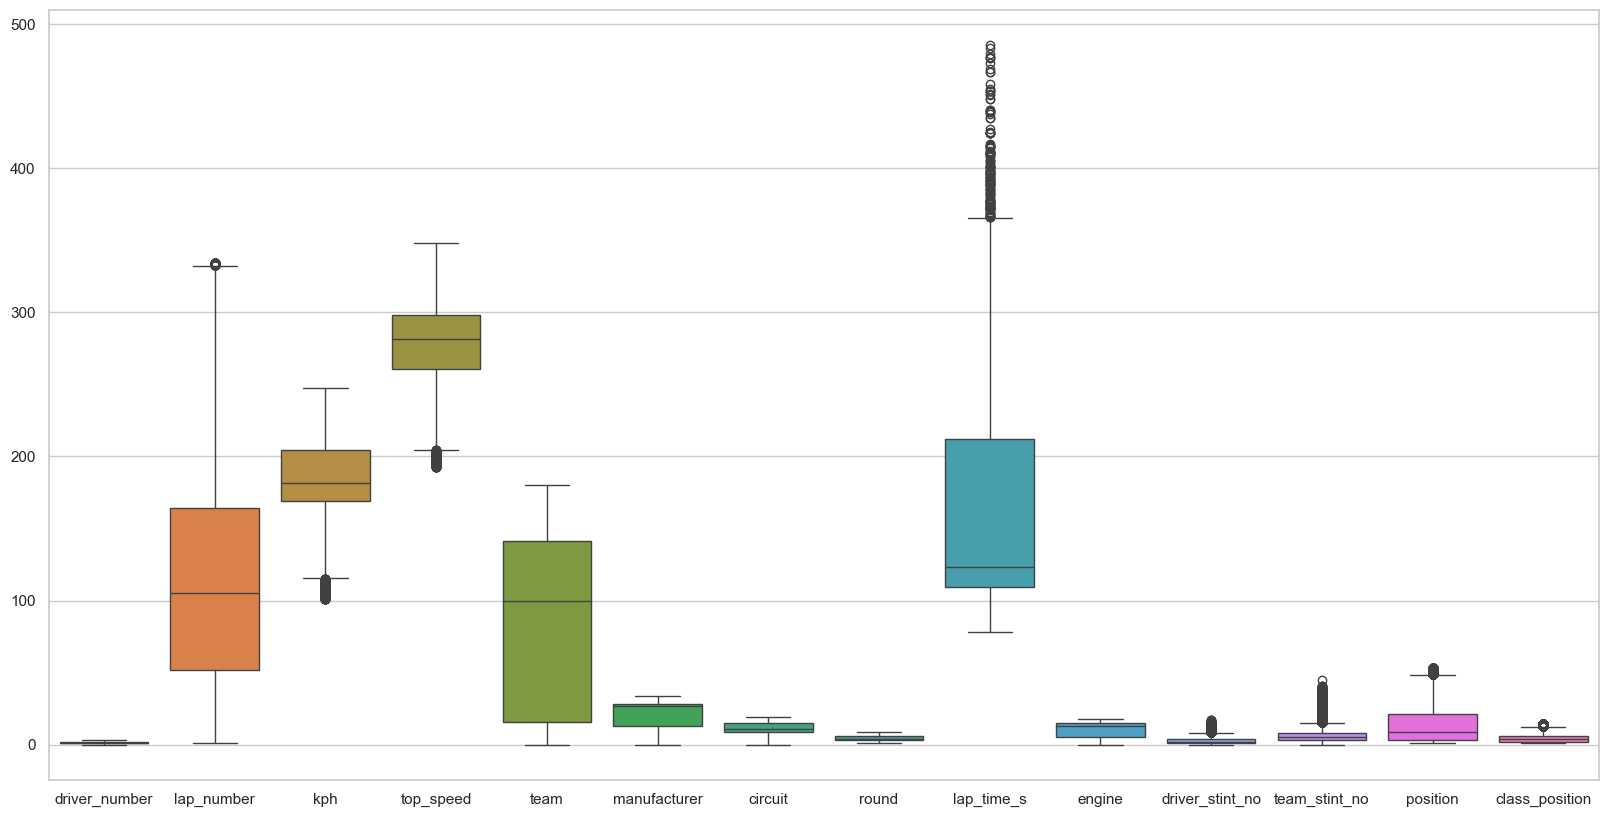

In [239]:
plt.figure(figsize=(20,10))
sns.boxplot(undersampled_df.drop(columns=['number','season_start'],axis=1))

C:\Users\joeva\AppData\Local\Temp\ipykernel_27488\1615867066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=undersampled_df,palette='pastel')


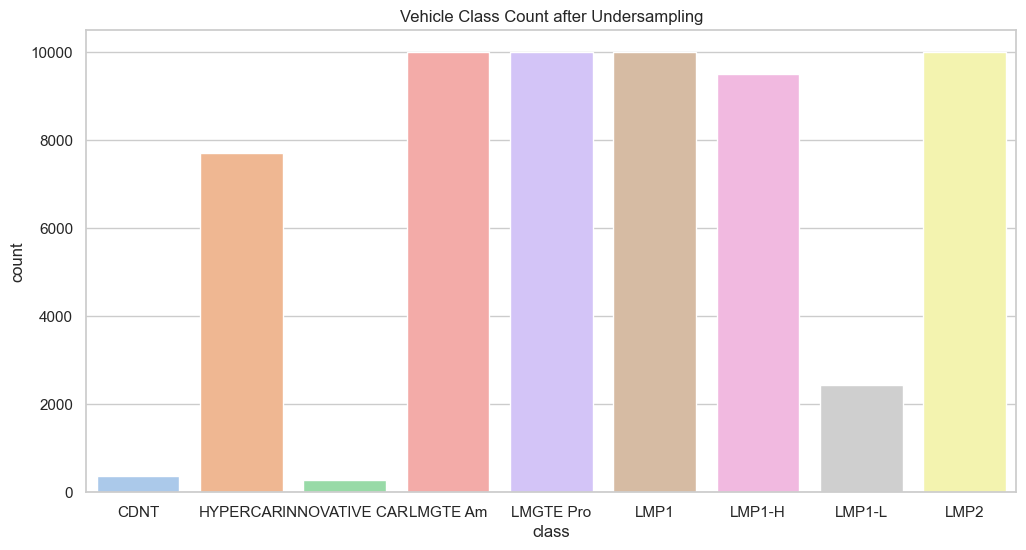

In [240]:
plt.figure(figsize=(12,6))
sns.countplot(x='class',data=undersampled_df,palette='pastel')
plt.title('Vehicle Class Count after Undersampling')
plt.show()

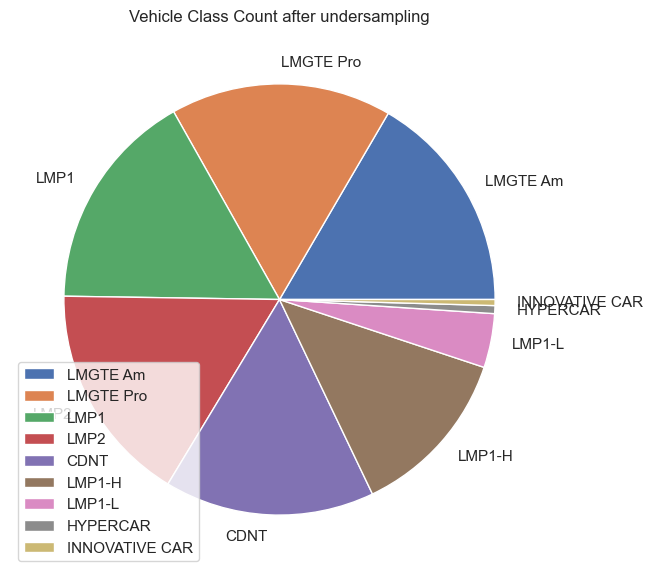

In [241]:
plt.figure(figsize=(7,7))
plt.pie(undersampled_df['class'].value_counts(),labels=df['class'].unique())
plt.title('Vehicle Class Count after undersampling')
plt.legend(loc='lower left')
plt.show()

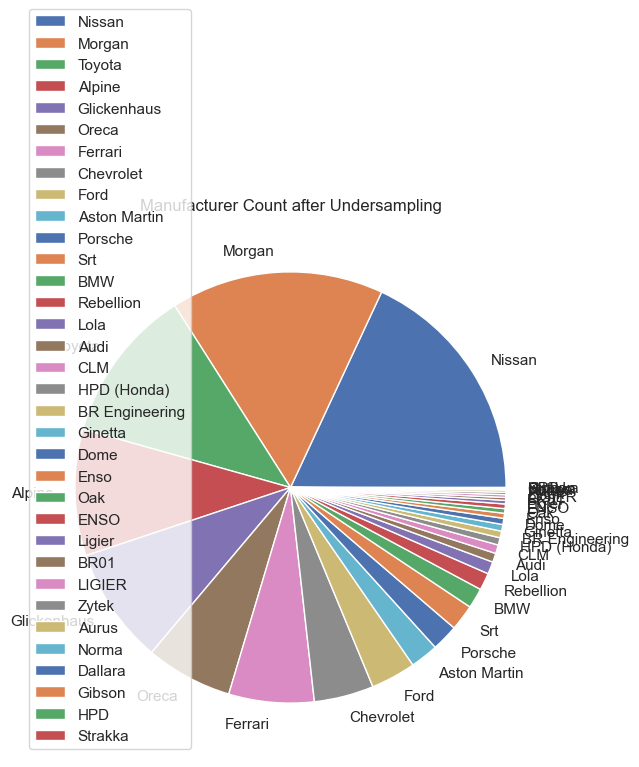

In [242]:
manufacture=label.inverse_transform(undersampled_df['manufacturer'])
manufacture_counts = pd.Series(manufacture)

plt.figure(figsize=(7, 7))
plt.pie(manufacture_counts.value_counts(),labels=manufacture_counts.unique())
plt.title('Manufacturer Count after Undersampling')
plt.legend(loc='lower left')
plt.show()

C:\Users\joeva\AppData\Local\Temp\ipykernel_27488\1255063453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=manufacture_counts,palette='pastel')


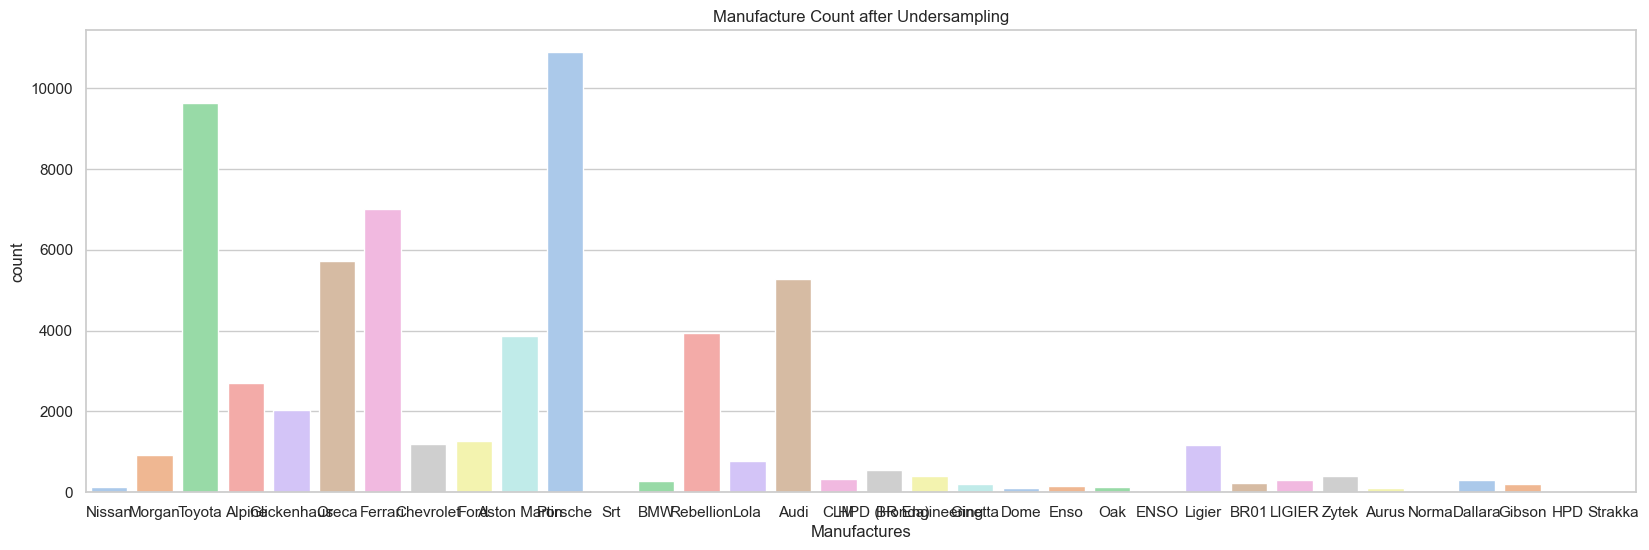

In [243]:
plt.figure(figsize=(20,6))
sns.countplot(x=manufacture_counts,palette='pastel')
plt.title('Manufacture Count after Undersampling')
plt.xlabel('Manufactures')
plt.show()

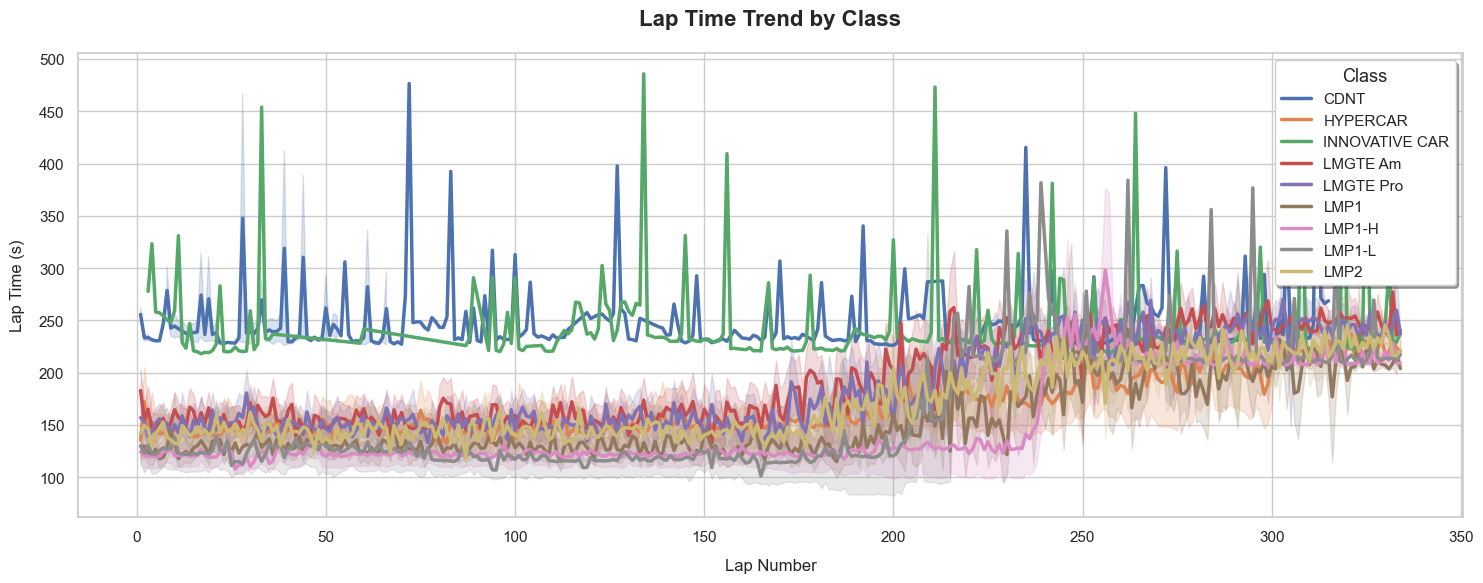

In [244]:
plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=undersampled_df, x='lap_number',y='lap_time_s',hue='class',linewidth=2.5)
plt.title('Lap Time Trend by Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lap Number', fontsize=12, labelpad=10)
plt.ylabel('Lap Time (s)', fontsize=12, labelpad=10)
plt.legend(title='Class', title_fontsize='13', loc='upper right', frameon=True, shadow=True, fontsize=11)
plt.tight_layout()
plt.show()

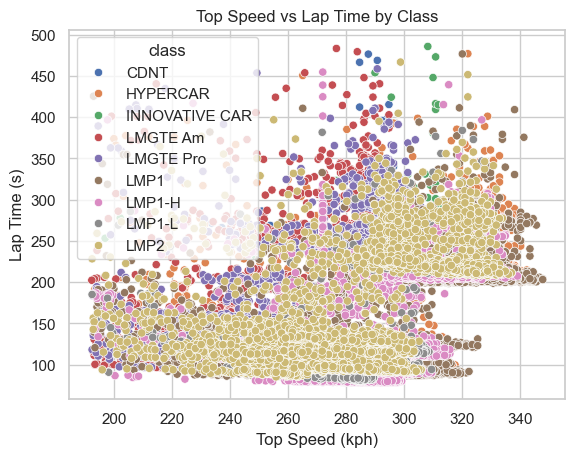

In [245]:
sns.scatterplot(data=undersampled_df, x='top_speed', y='lap_time_s', hue='class')
plt.title('Top Speed vs Lap Time by Class')
plt.xlabel('Top Speed (kph)')
plt.ylabel('Lap Time (s)')
plt.show()

In [246]:
cleaned_df.columns

Index(['number', 'driver_number', 'lap_number', 'kph', 'top_speed', 'class',
       'team', 'manufacturer', 'circuit', 'round', 'lap_time_s', 'engine',
       'driver_stint_no', 'team_stint_no', 'position', 'class_position',
       'season_start'],
      dtype='object')

#### Model Creation

In [247]:
x=undersampled_df.iloc[:,:-1].values
y=undersampled_df.iloc[:,-1].values
x

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 3.100e+01, 1.000e+00,
        2.012e+03],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 3.000e+01, 1.000e+00,
        2.012e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 3.200e+01, 1.000e+00,
        2.012e+03],
       ...,
       [2.000e+01, 2.000e+00, 1.290e+02, ..., 1.200e+01, 9.000e+00,
        2.021e+03],
       [2.300e+01, 1.000e+00, 1.430e+02, ..., 1.500e+01, 1.200e+01,
        2.017e+03],
       [3.700e+01, 0.000e+00, 4.400e+01, ..., 1.200e+01, 4.000e+00,
        2.014e+03]], shape=(60293, 16))

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train)

[[7.700e+01 0.000e+00 1.500e+02 ... 2.100e+01 1.000e+00 2.017e+03]
 [2.300e+01 1.000e+00 1.900e+02 ... 1.500e+01 1.000e+01 2.018e+03]
 [1.700e+01 2.000e+00 2.000e+02 ... 4.100e+01 1.000e+01 2.012e+03]
 ...
 [3.600e+01 3.000e+00 1.210e+02 ... 8.000e+00 3.000e+00 2.021e+03]
 [7.700e+01 2.000e+00 1.170e+02 ... 2.400e+01 6.000e+00 2.021e+03]
 [4.000e+00 1.000e+00 9.100e+01 ... 3.000e+01 7.000e+00 2.016e+03]]


In [249]:
unique_values = []
[unique_values.append(x) for x in y_train if x not in unique_values]
print(unique_values)

['LMGTE Am', 'LMP2', 'LMP1', 'LMGTE Pro', 'HYPERCAR', 'LMP1-H', 'LMP1-L', 'CDNT', 'INNOVATIVE CAR']


In [250]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# x_train=scale.fit_transform(x_train)
# x_test=scale.fit_transform(x_test)




MODEL : KNeighborsClassifier
Accuary : 0.7198695267580717
Precision : 0.7249267878462188
                precision    recall  f1-score   support

          CDNT       0.00      0.00      0.00       109
      HYPERCAR       0.74      0.89      0.81      2430
INNOVATIVE CAR       0.00      0.00      0.00        74
      LMGTE Am       0.80      0.59      0.68      3014
     LMGTE Pro       0.66      0.90      0.76      3023
          LMP1       0.72      0.44      0.55      2969
        LMP1-H       0.64      0.81      0.71      2806
        LMP1-L       0.65      0.70      0.67       696
          LMP2       0.85      0.77      0.81      2967

      accuracy                           0.72     18088
     macro avg       0.56      0.57      0.55     18088
  weighted avg       0.72      0.72      0.71     18088



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde




MODEL : SVC
Accuary : 0.5497014595311809
Precision : 0.5890630050118659
                precision    recall  f1-score   support

          CDNT       0.00      0.00      0.00       109
      HYPERCAR       0.95      0.26      0.41      2430
INNOVATIVE CAR       0.00      0.00      0.00        74
      LMGTE Am       0.58      0.49      0.53      3014
     LMGTE Pro       0.57      0.71      0.64      3023
          LMP1       0.36      0.72      0.48      2969
        LMP1-H       0.56      0.32      0.41      2806
        LMP1-L       0.00      0.00      0.00       696
          LMP2       0.75      0.88      0.81      2967

      accuracy                           0.55     18088
     macro avg       0.42      0.38      0.36     18088
  weighted avg       0.59      0.55      0.52     18088



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde




MODEL : BernoulliNB
Accuary : 0.25879035824856256
Precision : 0.44944161477506017
                precision    recall  f1-score   support

          CDNT       1.00      0.17      0.28       109
      HYPERCAR       0.71      0.38      0.49      2430
INNOVATIVE CAR       0.00      0.00      0.00        74
      LMGTE Am       0.19      0.78      0.30      3014
     LMGTE Pro       0.00      0.00      0.00      3023
          LMP1       1.00      0.12      0.22      2969
        LMP1-H       0.24      0.33      0.28      2806
        LMP1-L       0.00      0.00      0.00       696
          LMP2       0.70      0.04      0.07      2967

      accuracy                           0.26     18088
     macro avg       0.43      0.20      0.18     18088
  weighted avg       0.45      0.26      0.21     18088



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde




MODEL : DecisionTreeClassifier
Accuary : 0.996295886775763
Precision : 0.9962969228049694
                precision    recall  f1-score   support

          CDNT       1.00      0.98      0.99       109
      HYPERCAR       1.00      1.00      1.00      2430
INNOVATIVE CAR       0.96      0.96      0.96        74
      LMGTE Am       0.99      0.99      0.99      3014
     LMGTE Pro       0.99      0.99      0.99      3023
          LMP1       1.00      1.00      1.00      2969
        LMP1-H       1.00      1.00      1.00      2806
        LMP1-L       1.00      1.00      1.00       696
          LMP2       1.00      1.00      1.00      2967

      accuracy                           1.00     18088
     macro avg       0.99      0.99      0.99     18088
  weighted avg       1.00      1.00      1.00     18088




MODEL : RandomForestClassifier
Accuary : 0.9992812914639541
Precision : 0.9992827718263405
                precision    recall  f1-score   support

          CDNT       1.00

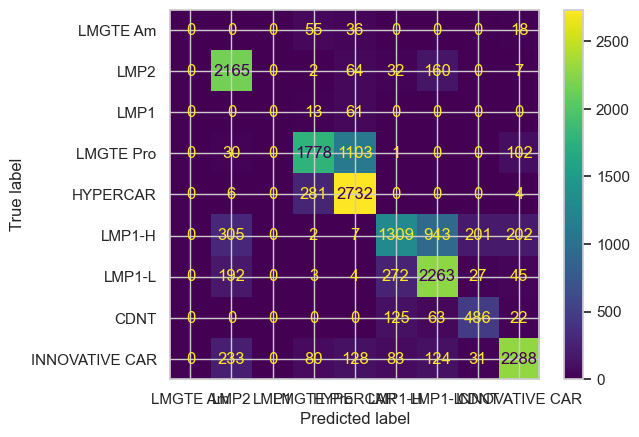

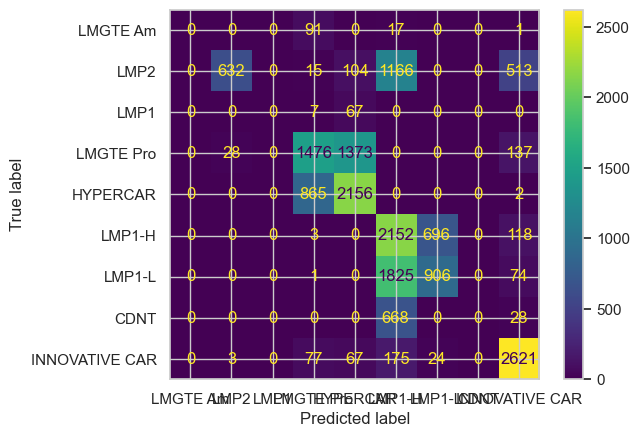

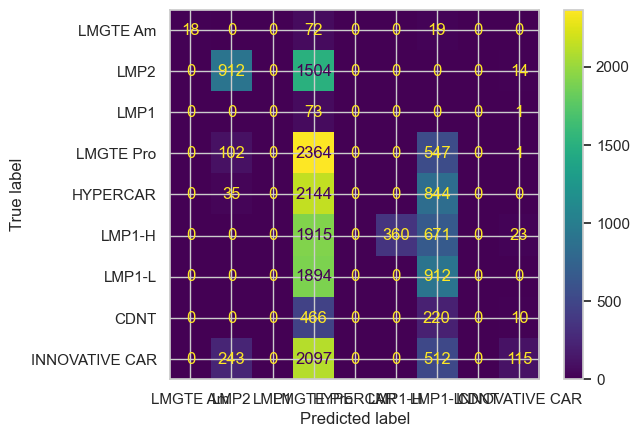

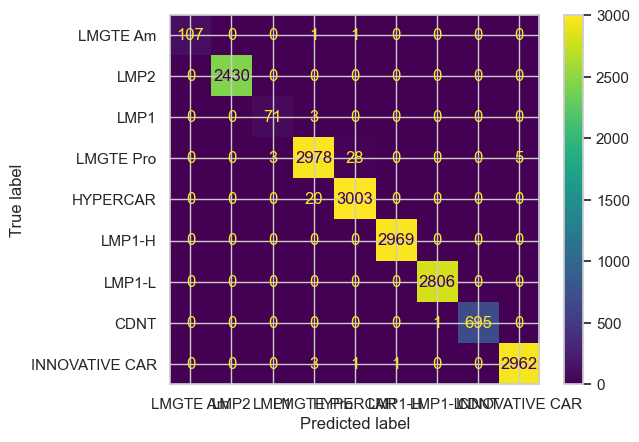

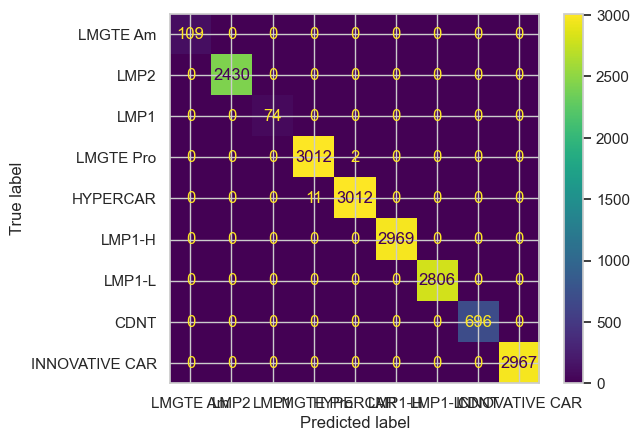

In [251]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

knn=KNeighborsClassifier(n_neighbors=201)
svc=SVC()
nb=BernoulliNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

models=[knn,svc,nb,dtc,rfc]
model_lst=['KNeighborsClassifier','SVC','BernoulliNB','DecisionTreeClassifier','RandomForestClassifier']

for i in range(len(model_lst)):
    
    model=models[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('\n\n')
    print("MODEL :",model_lst[i])
    print('Accuary :',accuracy_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred,average='weighted'))
    print(classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(cm,display_labels=unique_values)
    cmd.plot()
    plt.Figure(figsize=(8,8))

In [258]:
test_case1=[[50,21,32,173,350,2,13,5,1,109.092,13,2,2,1,1,2024]]
test_model=knn
test_model.fit(x_train,y_train)
y_pred_t=test_model.predict(test_case1)
print(y_pred_t)


['HYPERCAR']


In [259]:
test_case2=[[50,21,32,173,350,2,13,5,1,109.092,13,2,2,1,1,2024]]
test_model2=nb
test_model2.fit(x_train,y_train)
y_pred_t=test_model2.predict(test_case2)
print(y_pred_t)


['LMGTE Am']


In [260]:
test_case3=[[50,21,32,173,350,2,13,5,1,109.092,13,2,2,1,1,2024]]
test_model3=svc
test_model3.fit(x_train,y_train)
y_pred_t=test_model3.predict(test_case3)
print(y_pred_t)


['HYPERCAR']


In [261]:
test_case4=[[50,21,32,173,350,2,13,5,1,109.092,13,2,2,1,1,2024]]
test_model4=dtc
test_model4.fit(x_train,y_train)
y_pred_t=test_model4.predict(test_case4)
print(y_pred_t)


['LMP2']


In [263]:
test_case5=[[50,21,32,173,350,2,13,5,1,109.092,13,2,2,1,1,2024]]
test_model5=rfc
test_model5.fit(x_train,y_test)
y_pred_t=test_model5.predict(test_case5)
print(y_pred_t)


ValueError: Found input variables with inconsistent numbers of samples: [42205, 18088]

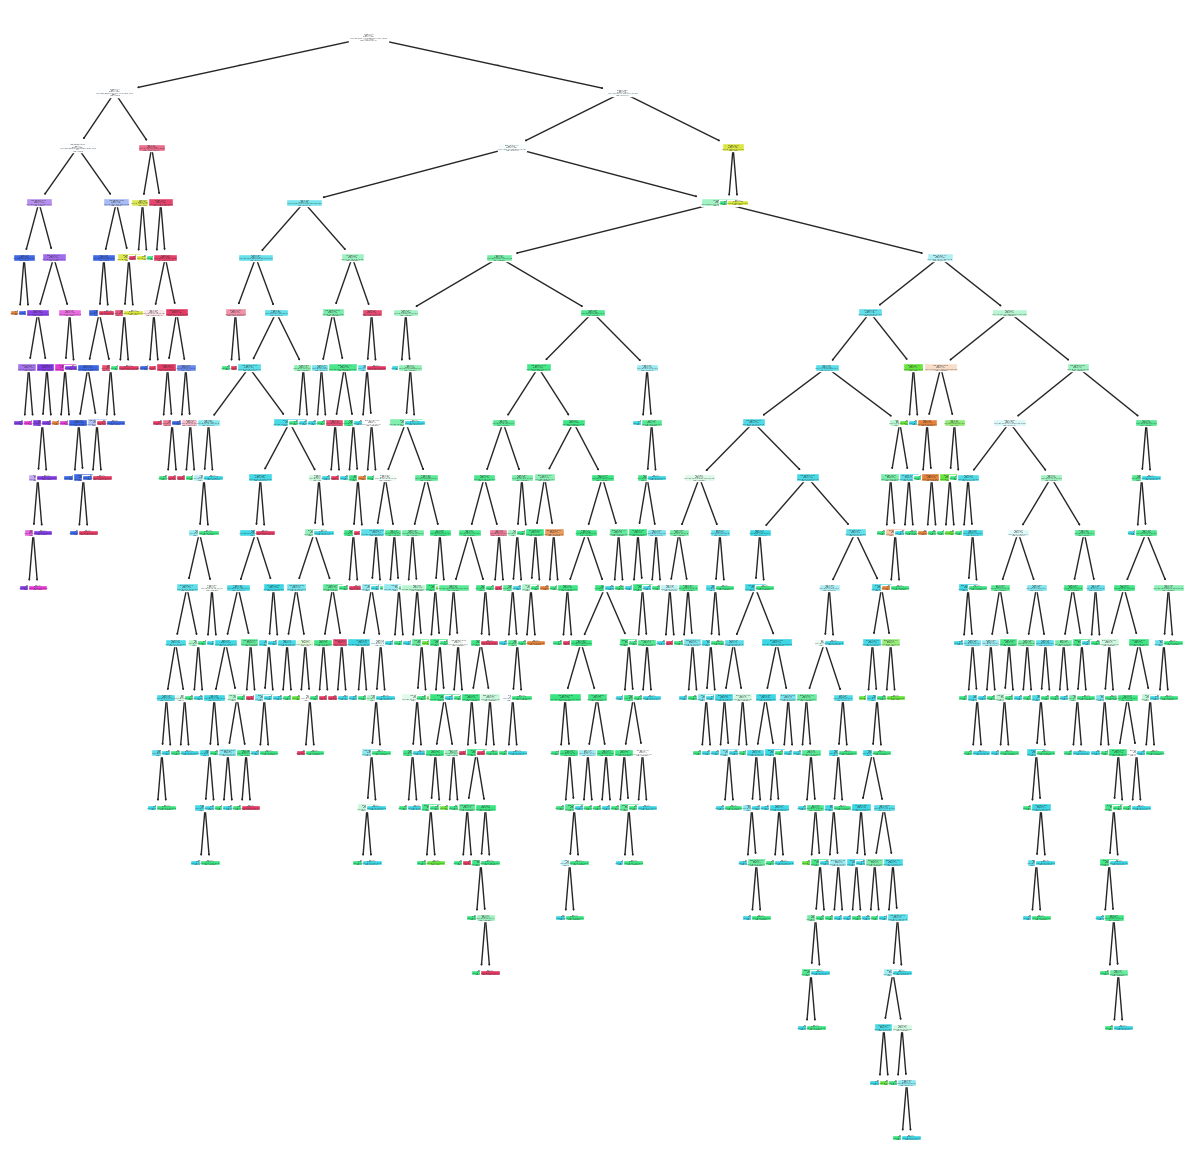

In [264]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(test_model4,feature_names=cleaned_df.columns[:-1],class_names=unique_values,filled=True)
plt.show()